# 04.01 선형회귀분석 예제 _ statsmodels 패키지 활용

## 1. 보스턴 집값 데이터

In [11]:
from sklearn.datasets import load_boston
import statsmodels.api as sm


boston = load_boston()
dir(boston)

dfx = pd.DataFrame(boston.data, columns = boston.feature_names)

# 회귀분석의 특징행렬, x데이터는 꼭 상수항 추가해줘야 함!
dfx = sm.add_constant(dfx)
dfy = pd.DataFrame(boston.target, columns = ["MEDV"])

model = sm.OLS(dfy,dfx)
result = model.fit()
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 17 May 2020   Prob (F-statistic):          6.72e-135
Time:                        14:37:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

### 1) 기초 회귀분석 결과 : 보스턴 집값 데이터
    1) Indus, Age 는 집값(종속변수)와 큰 상관관계가 없다고 추정
    2) warning 메시지에 따라, 독립변수 간 다중공선성 or 의심됨 (Condition No. 가 너무 큼) => 변수 제거 or 스케일링 필요

## 2. 당뇨병 진행도

In [13]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'target',
 'target_filename']

In [35]:
dfx = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
dfx = sm.add_constant(dfx)
dfy = pd.DataFrame(diabetes.target)


model = sm.OLS(dfy,dfx)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 17 May 2020   Prob (F-statistic):           3.83e-62
Time:                        14:48:56   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

### 1) 기초 회귀분석 결과 : 당뇨병 데이터
    1) age, s데이터 는 당뇨병 진행도(종속변수)와 큰 상관관계가 없다고 추정
    2) warning 메시지에 따라, 독립변수 간 다중공선성 or 의심됨 (Condition No. 가 너무 큼) => 변수 제거 or 스케일링 필요

## make regression 예제

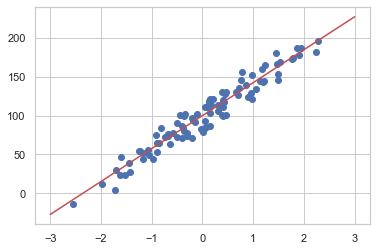

In [56]:
from sklearn.datasets import make_regression

X,y,w = make_regression(n_samples = 100, n_features = 1, bias = 100, noise = 10, coef=True, random_state=0)

xx = np.linspace(-3,3,100)
y0 = xx*w + 100
plt.plot(xx,y0,"r-")
plt.scatter(X,y)

In [73]:
np.random.seed(0)
a = np.random.rand(100).reshape(-1,10) # unifrom 에서 뽑음
b = np.random.randn(100).reshape(-1,10) # 정규분포에서 뽑음

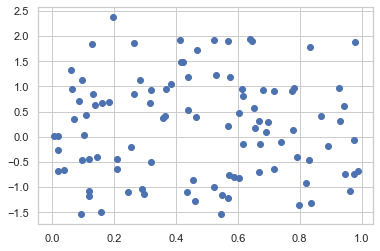

In [77]:
plt.scatter(a,b)

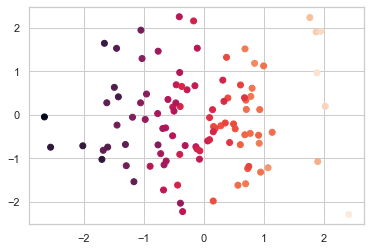

In [81]:
X, y, w = make_regression(
    n_samples=100, n_features=5, n_informative=1, bias = 100, noise = 10, coef=True, random_state=0
)

plt.scatter(X[:,0],X[:,1], c=y)

In [124]:
X, y, w = make_regression(
    n_samples=100, n_features=5, n_informative = 1, bias = 100, noise = 10, coef=True, random_state=0)

dfx = X
dfx = sm.add_constant(X)
dfy = y

model = sm.OLS(dfy,dfx)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     439.2
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.59e-63
Time:                        18:58:23   Log-Likelihood:                -368.12
No. Observations:                 100   AIC:                             748.2
Df Residuals:                      94   BIC:                             763.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.9262      1.015     96.524      0.0

# 06.02 기저함수 모형과 과최적화


**1) 비선형 모형**

```

기본적인 선형회귀모형 : 입력변수의 선형조합 ( $w^{T}x$ )

선형회귀모형의 한계 : 비선형 데이터의 회귀모형을 만들 수 없음

대안 : 비선형 회귀모형

비선형 회귀모형 : x에 대해선 비선형, w에 대해선 선형 (2page 상단)

    *비선형 모델을 구현하면서 선형모델의 방법론을 그대로 사용.
    *대신, 어떤 비선형함수를 얼마나 사용할지가 중요
    
    
    
    
    
    
비선형 함수 생성 => **기저함수 활용** 



```

**2) 기저함수**

```

기저함수 : 함수의 수열 (규칙이 정해져 있어, 규칙에 따라 여러개의 비선형함수를 만들어낼 수 있음)
    ex) 다항 기저함수 (2page 하단)
    
    
    
    
    
*비선형모형 : 가중치(모수) 갯수는 독립변수의 갯수가 아닌, 비선형함수의 갯수에 의존
    ex) 다항 기저함수 사용 시, 2차까지 하면 가중치 갯수는 3개, 10차까지 하면 가중치 갯수는 11개
    
기저함수 종류 : 체비셰프 다항식, 방사 기저함수, 삼각 기저함수, 시그모이드 기저함수    
    
```


**3) 과최적화**

```

1. 과최적화의 이유
    1) 모형의 모수(parameter)가 과도하게 많거나
    2) 다중공산성
    
2. 과최적화가 만드는 문제
    1) non-training data 입력 시, 오차가 커짐 (cross-validation 오차)
    2) 샘플이 조금만 달라져도 가중치 계수의 값이 크게 달라짐 (추정의 불안정성)
        *12,13page
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
```        
    

# 06.03 교차검증

- in-sample testing VS outofsample testing
- 과최적화 ==>> 교차 검증 결과, 두 경우의 성능 testing 결과가 크게 다름($R^2$)

## 1. sklearn 교차검증 

1) 단순데이터 분리 " tarin_test_split( ) "

2) 교차검증

3) 교차검증 반복 " cross_val_score( ) "  
        # 교안의 statsmodelsOLS 클래스 생성해, statsmodels 패키지 모형 객체 사용 가능하도록 변환

```


```
**K-Fold 교차검증**

    - 데이터 수가 적을 때, 데이터를 나눠 여러번 testing 진행 (6page 하단)

```






```


**cross_val_score()**

```
    - 11page






```


**벤치마크 검증 데이터**

```

    - 11page
    
    
    
    

```




# 06.04 다중공선성과 변수 선택



## 1) overfitting 주요원인 2가지

```
1) 모수 갯수가 너무 많아서

2) 다중공선성 (1page 하단)
    *x1과 x2가 거의 같은 데이터라면, 모형이 어떻게든 이를 구분하려 overfitting하게 됨
    
    
    
    
    
    
3) 다중공선성에 따른 overfitting 방지법 : 독립변수 제거

    - VIF 활용해 의존적인 변수 삭제 (VIF, Variance Inflation Factor)
    - PCA를 활용한 의존적인 변수 삭제
    - 정규화(regularized) 방법 사용
    
    
```

## 2) VIF

```



7page, 8page, 13page















```